#                                   Airfare price prediction

                                                                                                    - Uday Kumar S

Students have to propose a new model that can help the buyer to predict the price trends without official information from the airlines. 
Use the objective of Linear Regression is to find a line that minimizes the prediction error of all the data points.

## Import the necessry packages

In [50]:
import numpy as np                  # linear algebra   
import pandas as pd                 # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt     # data visualisation
import seaborn as sns 
import scipy.stats as stats
import sklearn
%matplotlib inline
matplotlib.style.use('ggplot')

## Loading the Data-Sets

In [51]:
data_train=pd.read_excel('/Users/rogudays/Documents/Adverks-Data_Science/Assignement/Airfare price prediction/Data_Train.xlsx')
data_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Understanding the Data

In [52]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [53]:
data_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [54]:
categorical=[var for var in data_train.columns if data_train[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n',categorical)

There are 10 categorical variables

The categorical variables are :

 ['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info']


In [55]:
for var in categorical:
    print(var,'contains',len(data_train[var].unique()),'labels')

Airline contains 12 labels
Date_of_Journey contains 44 labels
Source contains 5 labels
Destination contains 6 labels
Route contains 129 labels
Dep_Time contains 222 labels
Arrival_Time contains 1343 labels
Duration contains 368 labels
Total_Stops contains 6 labels
Additional_Info contains 10 labels


In [56]:
for var in categorical:
    print(data_train[var].value_counts())

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156


## Data Wrangling

### Cleaning and transforming

In [57]:
data_train.dropna(inplace=True)
data_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Time taken by plane to reach destination is called Duration
It is the differnce betwwen Departure Time and Arrival time

Assigning and converting Duration column into list

In [58]:
duration = list(data_train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

Adding duration_hours and duration_mins list to train_data dataframe


In [59]:
data_train["Duration_hours"] = duration_hours
data_train["Duration_mins"] = duration_mins
data_train.drop(["Duration"], axis = 1, inplace = True)

Converting Date_of_Journey to integers

In [60]:
data_train["Journey_day"] = pd.to_datetime(data_train.Date_of_Journey, format="%d/%m/%Y").dt.day
data_train["Journey_month"] = pd.to_datetime(data_train["Date_of_Journey"], format = "%d/%m/%Y").dt.month
data_train.drop(["Date_of_Journey"], axis = 1, inplace = True)

Departure time is when a plane leaves the gate. 
Similar to Date_of_Journey we can extract values from Dep_Time

Extracting Hours

In [61]:
data_train["Dep_hour"] = pd.to_datetime(data_train["Dep_Time"]).dt.hour

Extracting Minutes

In [62]:
data_train["Dep_min"] = pd.to_datetime(data_train["Dep_Time"]).dt.minute

Now we can drop Dep_Time as it is of no use

In [63]:
data_train.drop(["Dep_Time"], axis = 1, inplace = True)

Arrival time is when the plane pulls up to the gate.
Similar to Date_of_Journey we can extract values from Arrival_Time

Extracting Hours

In [64]:
data_train["Arrival_hour"] = pd.to_datetime(data_train.Arrival_Time).dt.hour

Extracting Minutes

In [65]:
data_train["Arrival_min"] = pd.to_datetime(data_train.Arrival_Time).dt.minute

Now we can drop Arrival_Time as it is of no use

In [66]:
data_train.drop(["Arrival_Time"], axis = 1, inplace = True)

In [67]:
data_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Duration_hours,Duration_mins,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,2,50,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,7,25,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,19,0,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,25,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,4,45,1,3,16,50,21,35


In [68]:
categorical=[var for var in data_train.columns if data_train[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n',categorical)

There are 6 categorical variables

The categorical variables are :

 ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


In [69]:
for var in categorical:
    print(var,'contains',len(data_train[var].unique()),'labels')

Airline contains 12 labels
Source contains 5 labels
Destination contains 6 labels
Route contains 128 labels
Total_Stops contains 5 labels
Additional_Info contains 10 labels


## Exploratory Data Analysis

### Airline vs Price

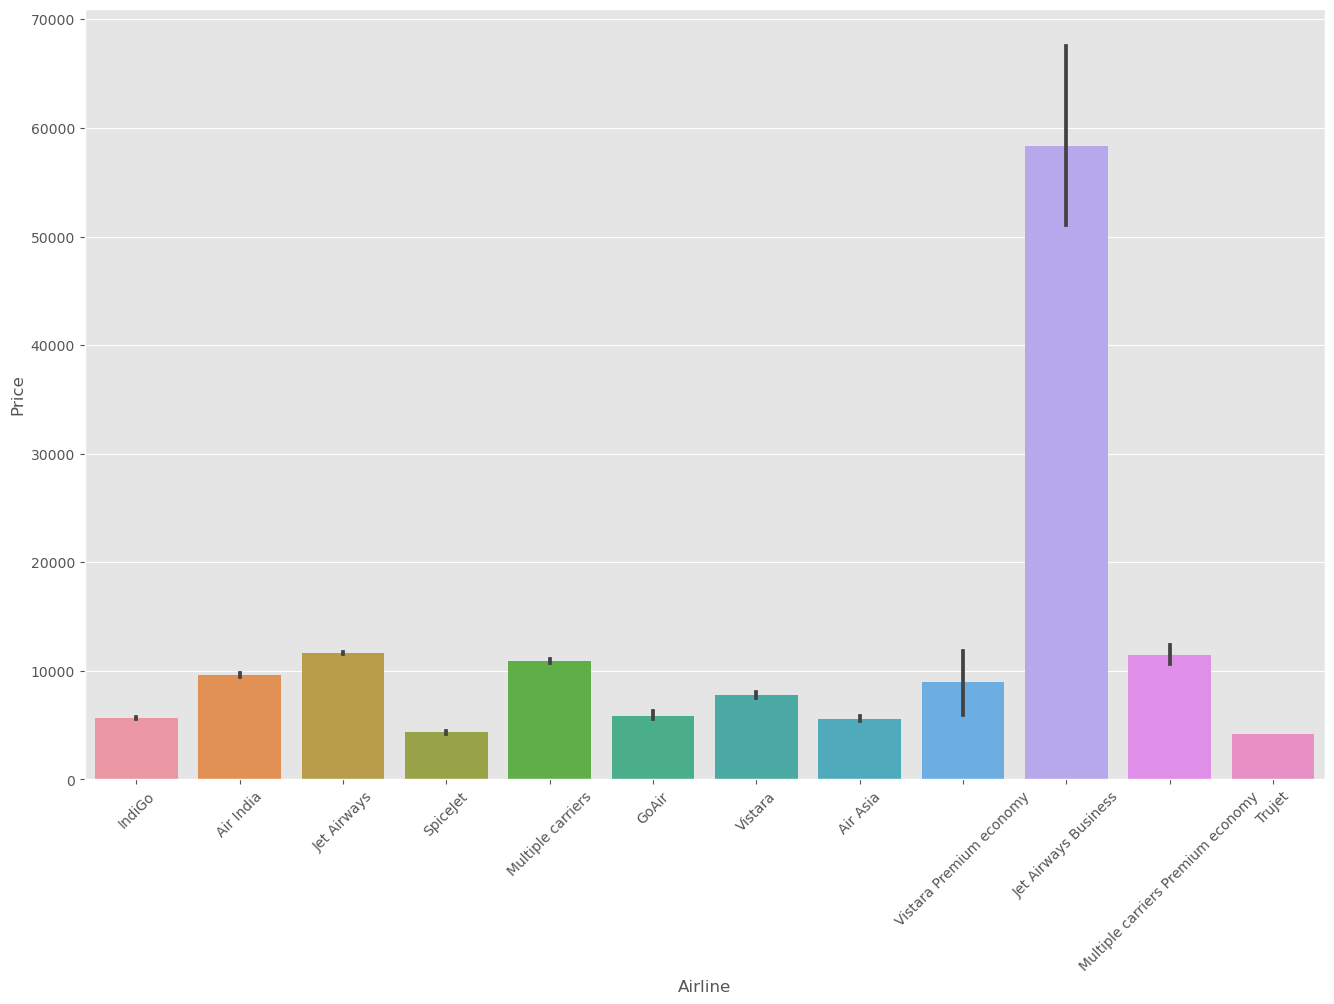

In [70]:
fig=plt.figure(figsize=(16,10))
sns.barplot(data = data_train, x="Airline", y="Price")
plt.xticks(rotation=45)
plt.show()

### Source vs Price

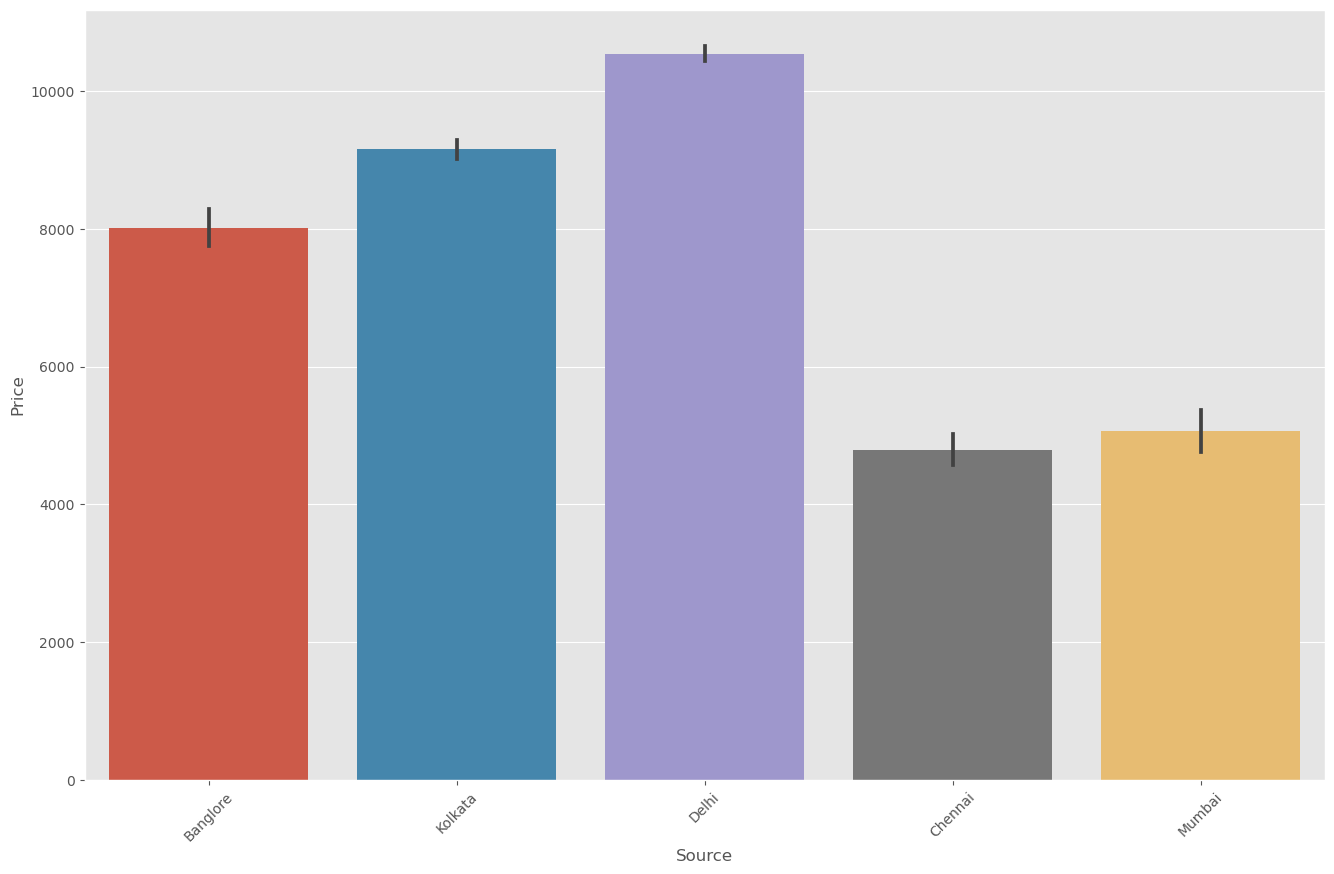

In [71]:
fig=plt.figure(figsize=(16,10))
sns.barplot(data = data_train, x="Source", y="Price")
plt.xticks(rotation=45)
plt.show()

### Destination vs Price

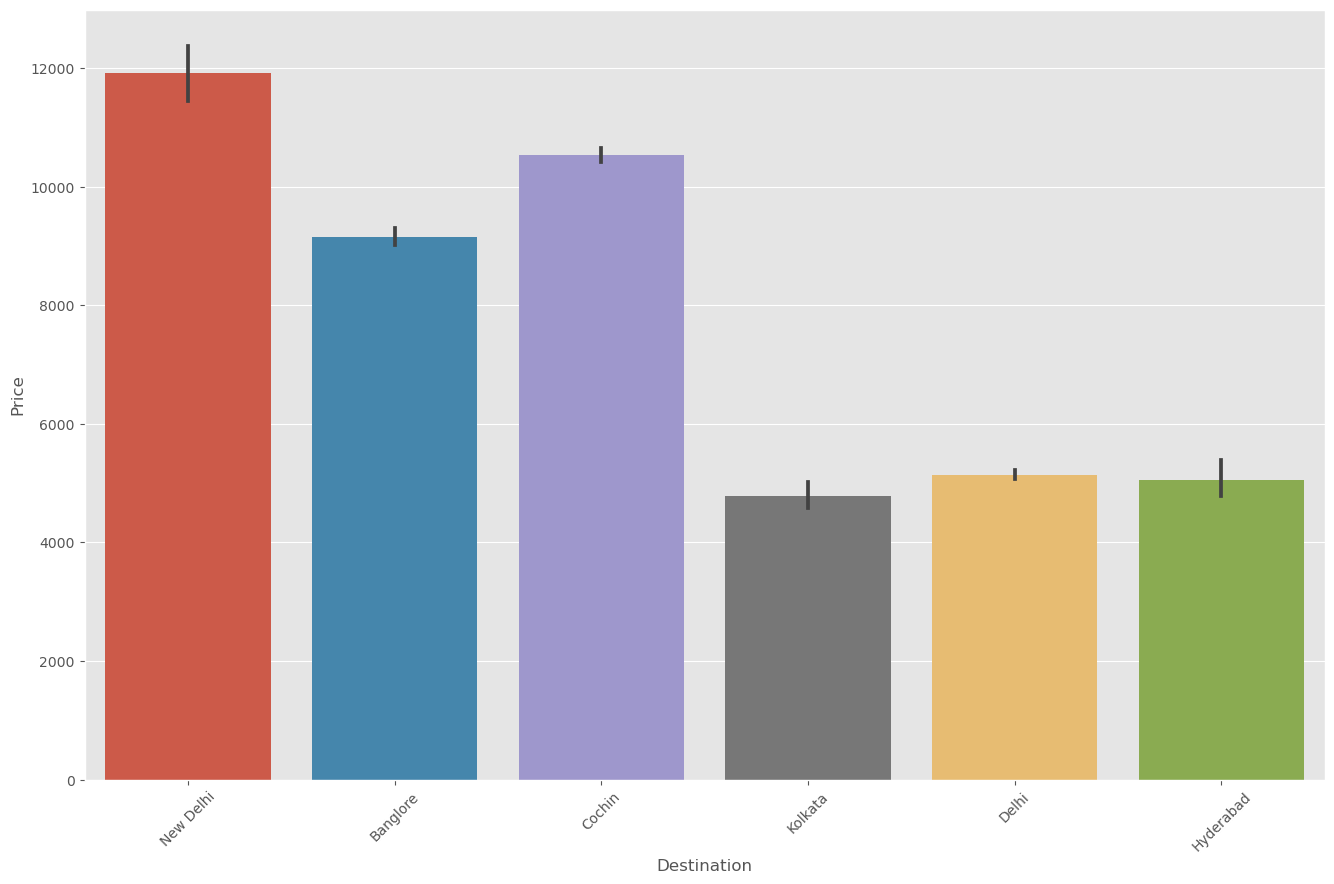

In [72]:
fig=plt.figure(figsize=(16,10))
sns.barplot(data = data_train, x="Destination", y="Price")
plt.xticks(rotation=45)
plt.show()

## Feature Engineering

In [73]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline = data_train[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [74]:
# As Source is Nominal Categorical data we will perform OneHotEncoding
Source = data_train[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [75]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding
Destination = data_train[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [76]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

data_train.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [77]:
data_train["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [78]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

data_train.replace({"non-stop":0, "1 stop":1, "2 stops":2, "3 stops":3, "4 stops":4}, inplace = True)

In [79]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Duration_hours,Duration_mins,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,0,3897,2,50,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,2,7662,7,25,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,2,13882,19,0,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,1,6218,5,25,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,1,13302,4,45,1,3,16,50,21,35


In [80]:
# Concatenate dataframe --> train_data + Airline + Source + Destination
train_data = pd.concat([data_train, Airline, Source, Destination], axis = 1)
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Duration_hours,Duration_mins,Journey_day,Journey_month,Dep_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,2,50,24,3,22,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,7,25,1,5,5,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,19,0,9,6,9,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,5,25,12,5,18,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,4,45,1,3,16,...,0,0,0,0,0,0,0,0,0,1


In [81]:
train_data.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
train_data.head()

,Total_Stops,Price,Duration_hours,Duration_mins,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,2,50,24,3,22,20,1,10,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,7,25,1,5,5,50,13,15,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,19,0,9,6,9,25,4,25,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,5,25,12,5,18,5,23,30,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,4,45,1,3,16,50,21,35,...,0,0,0,0,0,0,0,0,0,1


In [82]:
train_data.head()

,Total_Stops,Price,Duration_hours,Duration_mins,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,2,50,24,3,22,20,1,10,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,7,25,1,5,5,50,13,15,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,19,0,9,6,9,25,4,25,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,5,25,12,5,18,5,23,30,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,4,45,1,3,16,50,21,35,...,0,0,0,0,0,0,0,0,0,1


In [83]:
train_data.shape

(10682, 30)

## Loading the testing data set

In [84]:
data=pd.read_excel('/Users/rogudays/Documents/Adverks-Data_Science/Assignement/Airfare price prediction/Data_Train.xlsx')
test_data=data.drop(['Price'],axis=1)
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info


## Cleaning and Transformation of Testing data

In [85]:
# Preprocessing same as training data that we have done

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
dtypes: object(10)
memory usage: 834.7+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time       

## Mapping the X, and Y dataset

In [86]:
X = train_data.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [87]:
y = train_data.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

## Finding Correlation between Dependent and Independent  variables using HeatMap

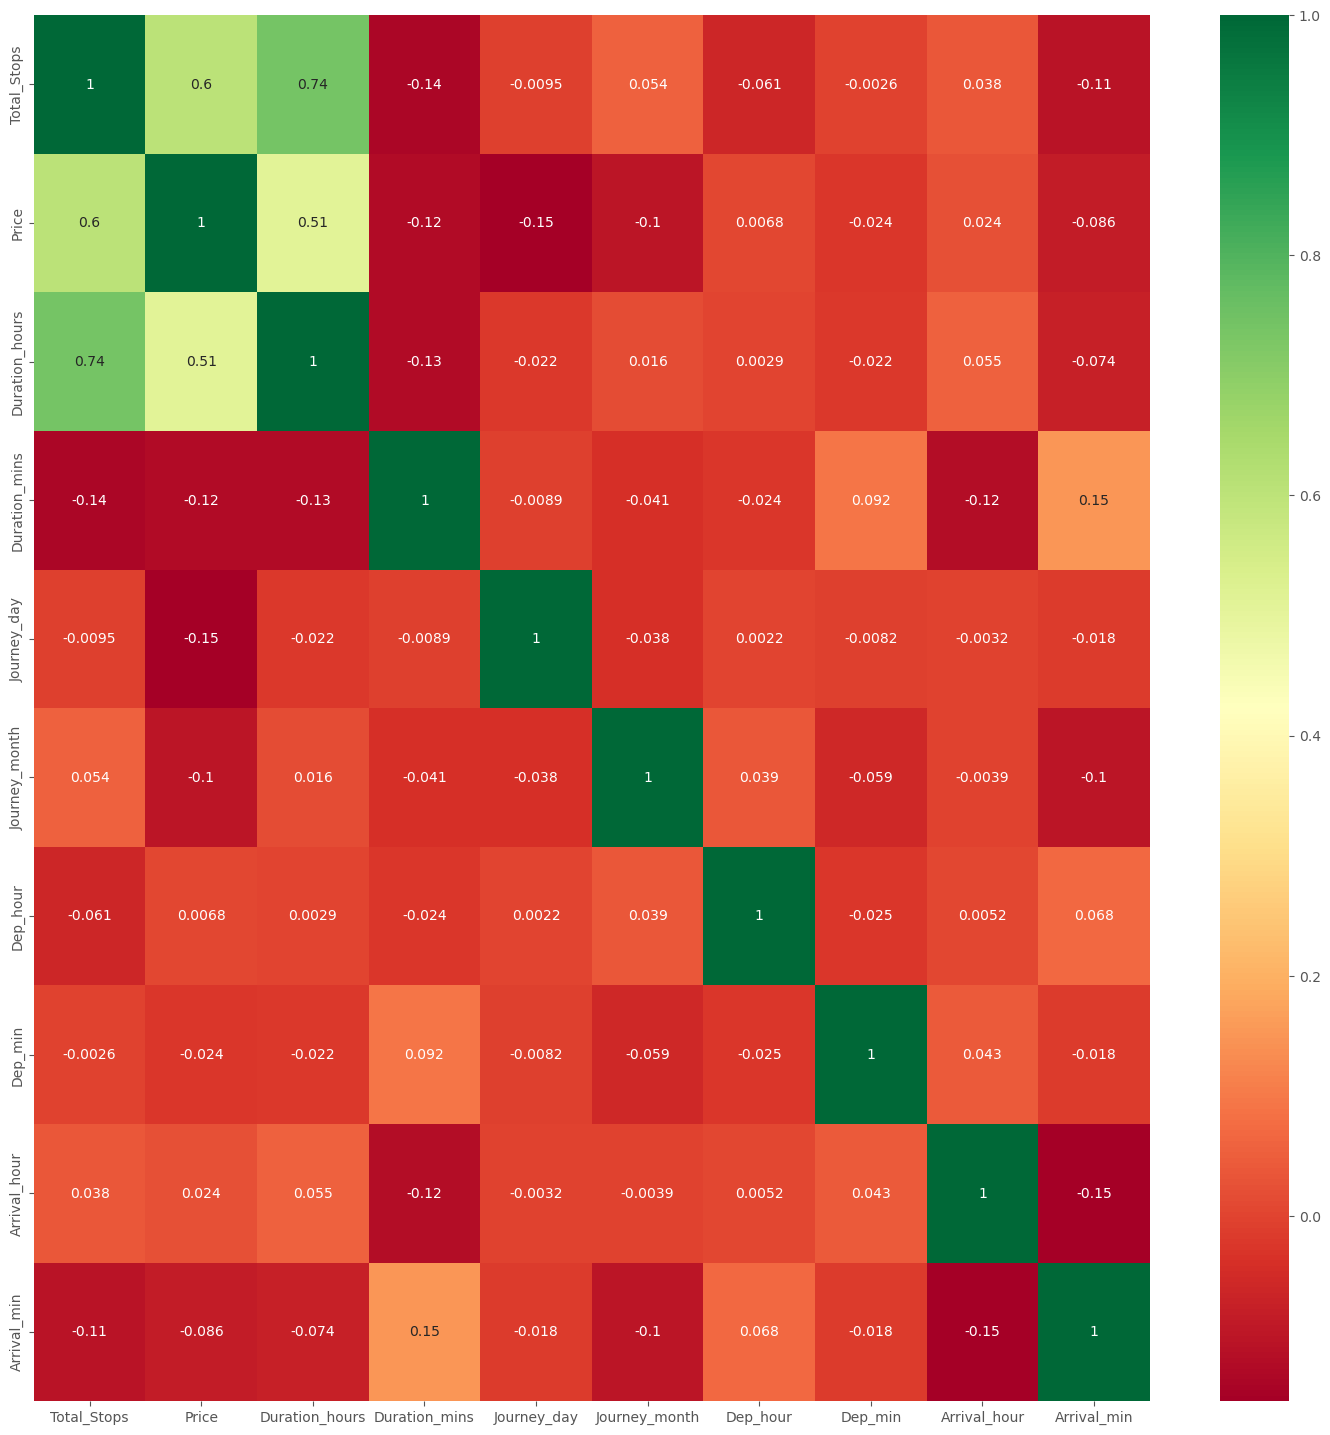

In [88]:
plt.figure(figsize = (18,18))
sns.heatmap(data_train.corr(), annot = True, cmap = "RdYlGn")
plt.show()

## Model Building

## Using Linear Regression

The idea of linear regression is simply finding a line that best fits the data. Extensions of linear regression include multiple linear regression (eg. finding a plane of best fit) and polynomial regression (eg. finding a curve of best fit).

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [90]:
X_train.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
749,0,27,6,10,20,11,50,1,30,0,...,0,0,0,0,1,0,0,1,0,0
6077,0,21,6,17,10,19,40,2,30,0,...,0,0,0,1,0,0,0,0,0,0
2373,1,27,5,15,0,1,30,10,30,0,...,0,0,1,0,0,1,0,0,0,0
2442,1,9,5,22,40,10,40,12,0,0,...,0,0,0,1,0,0,0,0,0,0
5402,2,9,6,19,45,19,15,23,30,1,...,0,0,1,0,0,1,0,0,0,0


In [91]:
y_train.head()

749      8040
6077     3873
2373    13377
2442     5192
5402     9968
Name: Price, dtype: int64

In [92]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [93]:
regression_model=linear_model.LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression()

In [94]:
pred=regression_model.predict(X_test)

## Prediction Results

In [95]:
regression_model.score(X_train,y_train)

0.6216950251455393

### The R Squared measure

In [96]:
test_score=r2_score(y_test,pred)
train_score=r2_score(y_train,regression_model.predict(X_train))

In [97]:
print('R2 score is',r2_score(y_test,pred))

R2 score is 0.6263921402248545


In [98]:
print('R2 score for train data',r2_score(y_train,regression_model.predict(X_train)))

R2 score for train data 0.6216950251455393
